In [52]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-10-09 06:26:33--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2022-10-09 06:26:33 (227 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [53]:
import json

with open("/content/sarcasm.json", "r") as f:
  data = json.load(f)

sentences = []
labels = []

for item in data:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

In [58]:
training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16

In [115]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [116]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [117]:
trunc_type = "post"
pad_type ="post"
oov_token = "<OOV>"
embedding_dim=16

In [118]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_idx = tokenizer.word_index

In [119]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, truncating=trunc_type, padding=pad_type, maxlen=max_length)

In [120]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, truncating=trunc_type, padding=pad_type, maxlen=max_length)

In [121]:
training_labels = np.array(training_labels)
testing_labels =  np.array(testing_labels)

In [122]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [123]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_20 (Dense)            (None, 24)                408       
                                                                 
 dense_21 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [125]:
hist = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 1.7356 - val_accuracy: 0.8015
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 1.7776 - val_accuracy: 0.8000
Epoch 3/30
625/625 [==============================] - 4s 7ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 1.8523 - val_accuracy: 0.8025
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 1.9902 - val_accuracy: 0.8012
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 1.8894 - val_accuracy: 0.7971
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 1.9728 - val_accuracy: 0.7962
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 2.0318 - val_accuracy: 0.7967
Epoch 

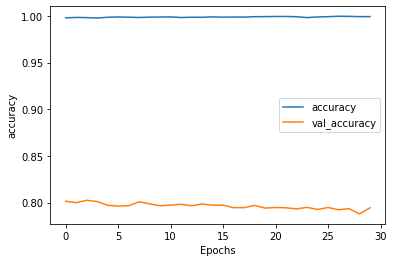

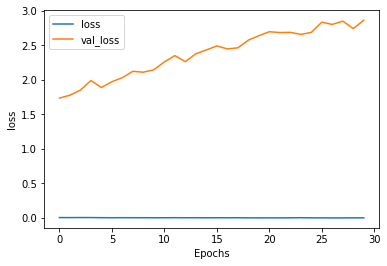

In [127]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(hist, "accuracy")
plot_graphs(hist, "loss")

In [128]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(10000, 16)
